The following command installs all the required Python packages listed in the `requirements.txt` file:
!pip install -r requirements.txt

In [ ]:
!pip install -r requirements.txt


 Importing Required Libraries

In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

Setting Image and Training Parameters

In [14]:
image_width = 170
image_height = 227
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

Loading Image Dataset from Directory

In [15]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    "datasets",
    shuffle=True,
    image_size = (image_height, 170),
    batch_size = BATCH_SIZE,
)

Found 30000 files belonging to 2 classes.


Classify the image classes

In [16]:
image_classes = datasets.class_names
image_classes

['Negative', 'Positive']

In [17]:
len(datasets)

938

Displaying Sample Images from the Dataset for testing

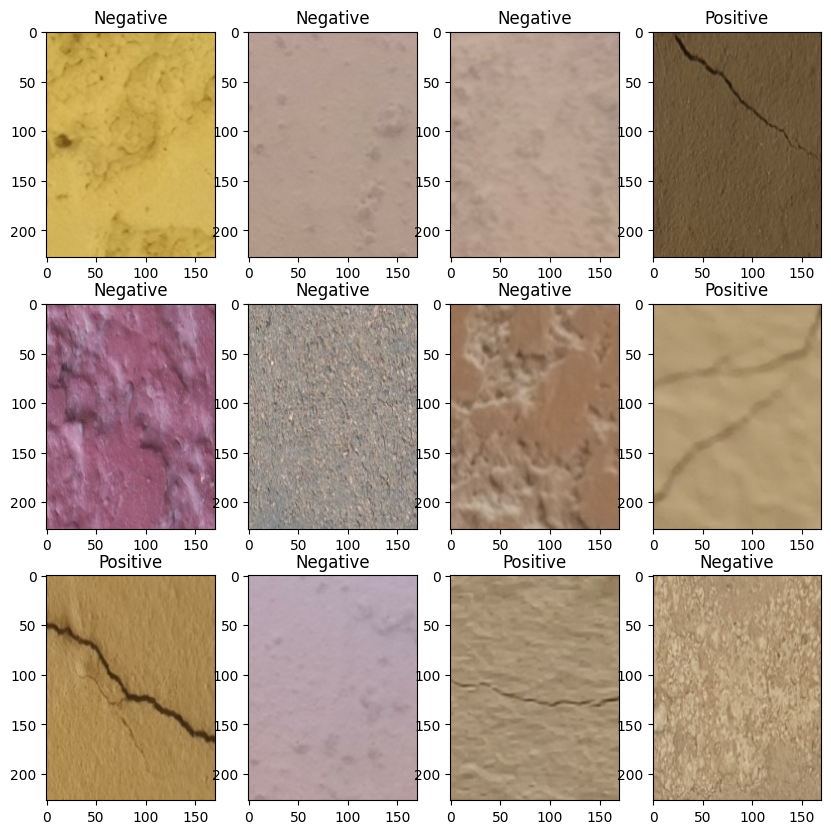

In [18]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in datasets.take(1):
    for i in range(12):
        plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(image_classes[label_batch[i]])

Splitting the Dataset into Training Validation and Test Sets

In [19]:
train_size = 0.8
len(datasets) * train_size

750.4000000000001

In [20]:
train_ds = datasets.take(750)

In [21]:
test_ds = datasets.skip(750)

In [22]:
val_size = 0.1
len(datasets) * val_size

93.80000000000001

In [23]:
val_ds = test_ds.take(93)
len(val_ds)

93

In [24]:
test_ds = test_ds.skip(93)
len(test_ds)

95

In [25]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds, val_ds, test_ds

In [26]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(datasets)

len(train_ds), len(val_ds), len(test_ds)


(750, 93, 95)

Optimizing Dataset for Faster Training

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_height, image_width),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [29]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

Defining the CNN Model Architecture

In [2]:
input_shape = (BATCH_SIZE, image_height, image_width, CHANNELS)
n_classes = 2 

model = models.Sequential([
    resize_and_rescale,       
    data_augmentation,        
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax') 
])
model.build(input_shape=(None, 227, 170, 3))

NameError: name 'BATCH_SIZE' is not defined

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 227, 170, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 227, 170, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 225, 168, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 84, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 82, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 41, 64)       0         
 2D)                                                  

Compiling the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


Training the Model

In [33]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
750/750 [==============================] - 785s 1s/step - loss: 0.2242 - accuracy: 0.9035 - val_loss: 0.0840 - val_accuracy: 0.9684
Epoch 2/20
750/750 [==============================] - 748s 998ms/step - loss: 0.0881 - accuracy: 0.9699 - val_loss: 0.0875 - val_accuracy: 0.9674
Epoch 3/20
750/750 [==============================] - 749s 999ms/step - loss: 0.0687 - accuracy: 0.9783 - val_loss: 0.0542 - val_accuracy: 0.9815
Epoch 4/20
750/750 [==============================] - 772s 1s/step - loss: 0.0575 - accuracy: 0.9826 - val_loss: 0.0428 - val_accuracy: 0.9856
Epoch 5/20
750/750 [==============================] - 786s 1s/step - loss: 0.0512 - accuracy: 0.9851 - val_loss: 0.0482 - val_accuracy: 0.9852
Epoch 6/20
750/750 [==============================] - 879s 1s/step - loss: 0.0420 - accuracy: 0.9885 - val_loss: 0.0512 - val_accuracy: 0.9876
Epoch 7/20
750/750 [==============================] - 1141s 2s/step - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.0617 - val_accuracy:

In [34]:
scores = model.evaluate(test_ds)

95/95 [==============================] - 59s 281ms/step - loss: 0.0224 - accuracy: 0.9957


In [35]:
scores

[0.022353382781147957, 0.9957236647605896]

In [36]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 750}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Visualizing Training and Validation Progress

Text(0.5, 1.0, 'Training and Validation Loss')

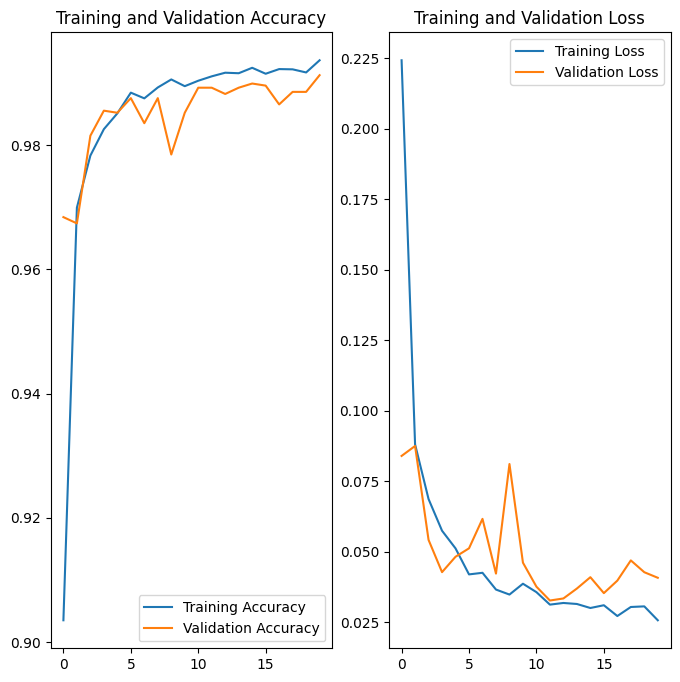

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

 Making Predictions on the Test Dataset

First Image to predict
First Image's Actual Label :  Negative
1/1 [==============================] - 0s 300ms/step
Predicted Label :  Negative


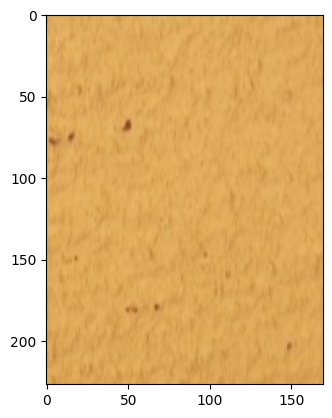

In [46]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First Image to predict")
    plt.imshow(first_image)
    print("First Image's Actual Label : ", image_classes[first_label])

    batch_prediction = model.predict(images_batch)

    print("Predicted Label : ", image_classes[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = image_classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


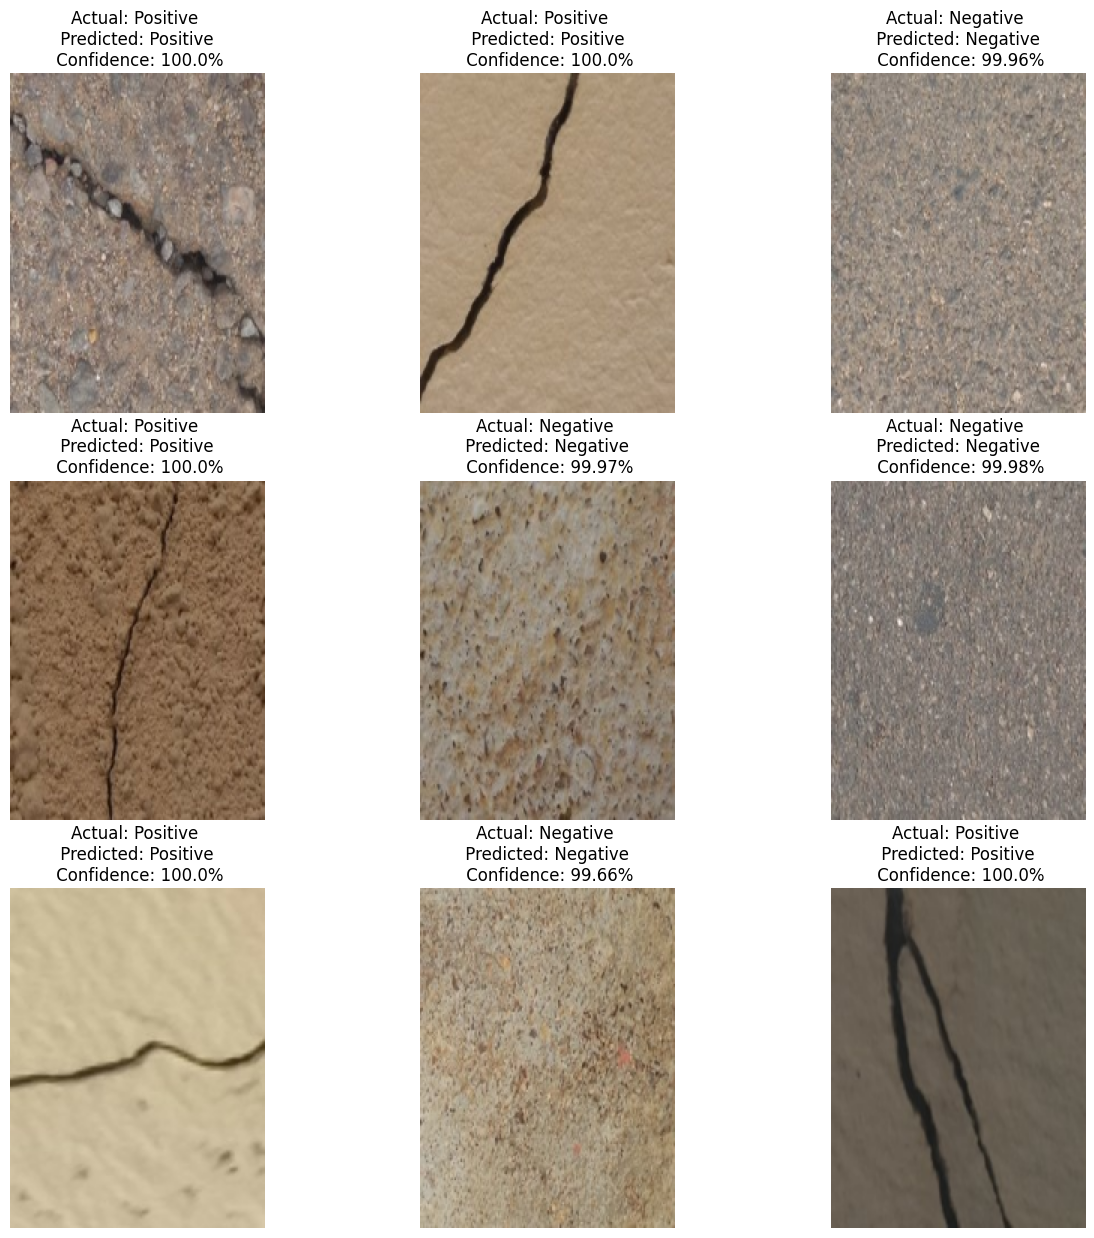

In [55]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8")) 

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class =  image_classes[labels[i]]

        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Confidence: {confidence}%")

        plt.axis("off")



Finally, saving the model

In [57]:
model_version = 1 
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets
